In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
import math
import copy
import Supervise_ML as sml
plt.style.use('fivethirtyeight')

In [3]:
z_in = np.array([1,2,3,4,5])
exp_in = np.exp(z_in)
print(exp_in)

[  2.71828183   7.3890561   20.08553692  54.59815003 148.4131591 ]


In [4]:
def sigmoid(z):
    
    g = 1/(1+(np.exp(-z)))
    return g

In [5]:
print(sigmoid(7))

0.9990889488055994


In [6]:
np.set_printoptions(precision=3)
y = sigmoid(z_in)

In [7]:
print(y)

[0.731 0.881 0.953 0.982 0.993]


In [8]:
print("Input: z and Output y")
print(np.c_[z_in,y])

Input: z and Output y
[[1.    0.731]
 [2.    0.881]
 [3.    0.953]
 [4.    0.982]
 [5.    0.993]]


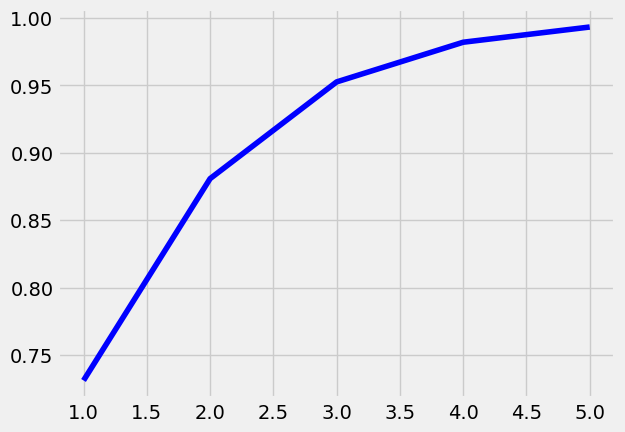

In [9]:
plt.plot(z_in,y,c='b')

[[-1.000e+01  4.540e-05]
 [-9.000e+00  1.234e-04]
 [-8.000e+00  3.354e-04]
 [-7.000e+00  9.111e-04]
 [-6.000e+00  2.473e-03]
 [-5.000e+00  6.693e-03]
 [-4.000e+00  1.799e-02]
 [-3.000e+00  4.743e-02]
 [-2.000e+00  1.192e-01]
 [-1.000e+00  2.689e-01]
 [ 0.000e+00  5.000e-01]
 [ 1.000e+00  7.311e-01]
 [ 2.000e+00  8.808e-01]
 [ 3.000e+00  9.526e-01]
 [ 4.000e+00  9.820e-01]
 [ 5.000e+00  9.933e-01]
 [ 6.000e+00  9.975e-01]
 [ 7.000e+00  9.991e-01]
 [ 8.000e+00  9.997e-01]
 [ 9.000e+00  9.999e-01]]


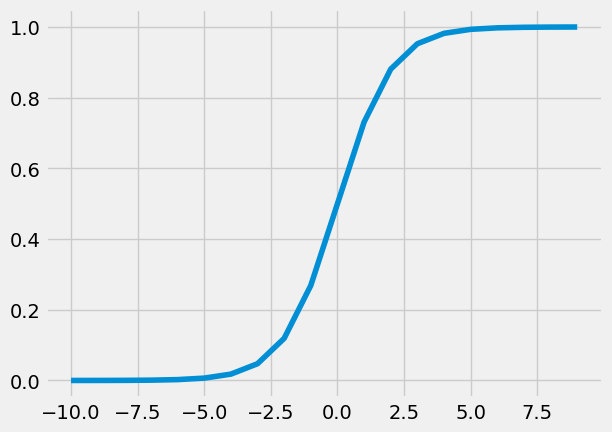

In [10]:
x2 = np.arange(-10,10)
y2 = sigmoid(x2)
print(np.c_[x2,y2])
plt.plot(x2,y2)

In [11]:
xline = np.zeros_like(x2)
yline = np.linspace(0.0,1.0,num=xline.shape[0])

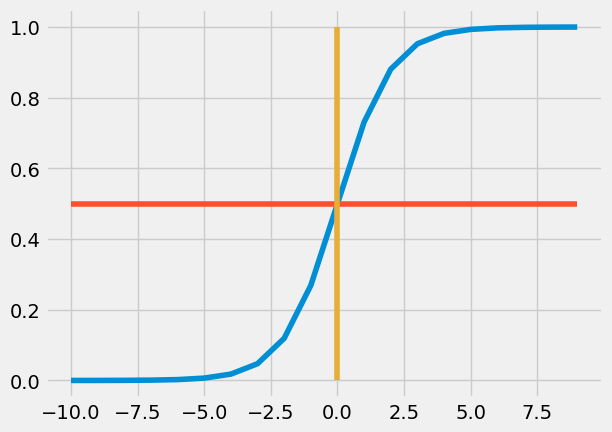

In [12]:
plt.plot(x2,y2)
plt.plot(x2, xline + 0.5)
plt.plot(xline,yline)

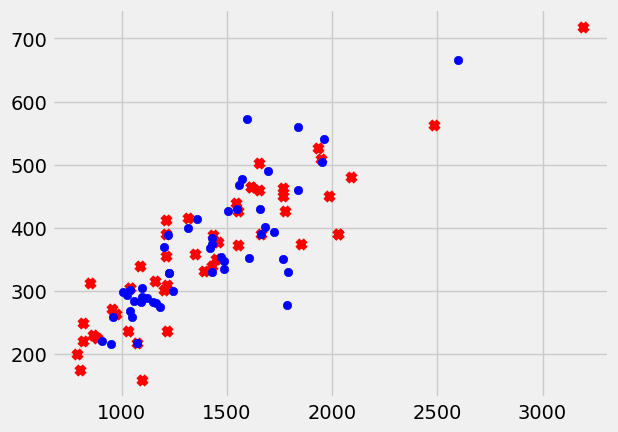

In [13]:
#Decision Boundary
df = pd.read_csv('Binary_Houses.csv')

delhi = df[df['Area'] == 'Delhi']
mumbai = df[df['Area'] == 'Mumbai']

plt.scatter(delhi['Size'], delhi['Prices'], marker = 'x', c='r')
plt.scatter(mumbai['Size'], mumbai['Prices'], marker='o', c='b')
plt.show()

In [14]:
X_train = df.iloc[:,[1,5]]
y_train = df.iloc[:,6]
# y_train

In [15]:
def loss(fx_wb,y_i):
    y = np.array(pd.to_numeric(y_i))
    loss_i = -(y * np.log(fx_wb)) - ((1 - y) * np.log(1 - fx_wb))
    return loss_i

loss(np.array([[0.9,0.2]]),0)

array([[2.303, 0.223]])

In [16]:
def cost_logarithmic(X, y, w, b):
    
    # X = Xp.to_numpy()
    # y = yp.to_numpy()
    
    m = X.shape[0]
    
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  loss(f_wb_i,y[i])
    cost /= m
    
    return cost

#Now, these functions will thrown an error because the data can have strings.
#So we'll have to label,encode the data into something else.

X_t = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_t = np.array([0, 0, 0, 1, 1, 1]) 
"""y_train1 = pd.Series(y_train)

y_train2 = y_train1.map({'Delhi' : 0, 'Mumbai' : 1})
y_train3 = np.array(y_train2)"""

w_tmp = np.array([1,1])
b_tmp = -3
cost_logarithmic(X_t, y_t, w_tmp, b_tmp)

0.36686678640551745

In [17]:
# def manual_label_encoding_binary(arr):
#     
#     mapping = {'Delhi' : 0, 'Mumbai' : 1}
#     y = arr.map(mapping)
#     
#     return y
# 
# y_train = manual_label_encoding_binary(y_train)
# print(y_train)
# w1 = np.array([0.1,0.2])
# cost_logarithmic(X_train,y_train,w1,0)

In [18]:
#GRADIENT DESCENT
X_g = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_g = np.array([0, 0, 0, 1, 1, 1])
w_g = np.array([2.,3.])
b_g = 1.

def gradient_logistic(X,y,w,b):
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.
    
    for i in range(m):
        fx_wb = sigmoid(np.dot(X[i],w) + b)
        err = fx_wb - y[i]
        for j in range(n):
            dj_dw[j] += (err * X[i,j])
        dj_db += err
        
    dj_dw /= m
    dj_db /= m
    
    return dj_dw,dj_db

gradient_logistic(X_g,y_g,w_g,b_g)

(array([0.498, 0.499]), 0.49861806546328574)

In [19]:
def gradient_descent_Logistic(X,y,w_in,b_in,alpha,iters):
    m,n = X.shape
    
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(iters):
        J_history.append(cost_logarithmic(X,y,w,b))

        dj_dw,dj_db = gradient_logistic(X,y,w,b)
        
        w -= alpha * dj_dw
        b -= alpha * dj_db
                
        if i% math.ceil(iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
            
    return w, b, J_history

In [20]:
w_gl = np.zeros_like(X_g[0])
b_gl = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent_Logistic(X_g, y_g, w_gl, b_gl, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.6931471805599453   
Iteration 1000: Cost 0.1592335649264797   
Iteration 2000: Cost 0.08464109524940833   
Iteration 3000: Cost 0.05707199929670009   
Iteration 4000: Cost 0.042918276134429036   
Iteration 5000: Cost 0.03434535175949304   
Iteration 6000: Cost 0.028608582605098992   
Iteration 7000: Cost 0.024505087438574217   
Iteration 8000: Cost 0.021426396760803046   
Iteration 9000: Cost 0.019032264597755078   

updated parameters: w:[5.281 5.078], b:-14.222409982019837


In [47]:
#REGULARIZATION OF LINEAR AND LOGISTIC REGRESSION

df = pd.read_csv('Binary_Houses.csv')
X_test = df.iloc[:,[1,2,3,4]].to_numpy()
w_test = np.array([1,2,3,4])
w_test.reshape(1,-1)
X_test

array([[9.520e+02, 2.000e+00, 1.000e+00, 6.500e+01],
       [1.244e+03, 3.000e+00, 1.000e+00, 6.400e+01],
       [1.947e+03, 3.000e+00, 2.000e+00, 1.700e+01],
       [1.725e+03, 3.000e+00, 2.000e+00, 4.200e+01],
       [1.959e+03, 3.000e+00, 2.000e+00, 1.500e+01],
       [1.314e+03, 2.000e+00, 1.000e+00, 1.400e+01],
       [8.640e+02, 2.000e+00, 1.000e+00, 6.600e+01],
       [1.836e+03, 3.000e+00, 1.000e+00, 1.700e+01],
       [1.026e+03, 3.000e+00, 1.000e+00, 4.300e+01],
       [3.194e+03, 4.000e+00, 2.000e+00, 8.700e+01],
       [7.880e+02, 2.000e+00, 1.000e+00, 8.000e+01],
       [1.200e+03, 2.000e+00, 2.000e+00, 1.700e+01],
       [1.557e+03, 2.000e+00, 1.000e+00, 1.800e+01],
       [1.430e+03, 3.000e+00, 1.000e+00, 2.000e+01],
       [1.220e+03, 2.000e+00, 1.000e+00, 1.500e+01],
       [1.092e+03, 2.000e+00, 1.000e+00, 6.400e+01],
       [8.480e+02, 1.000e+00, 1.000e+00, 1.700e+01],
       [1.682e+03, 3.000e+00, 2.000e+00, 2.300e+01],
       [1.768e+03, 3.000e+00, 2.000e+00, 1.800

In [48]:
y_test = df['Prices'].to_numpy()
y_test

array([271.5  , 300.   , 509.8  , 394.   , 540.   , 415.   , 230.   ,
       560.   , 294.   , 718.2  , 200.   , 302.   , 468.   , 374.2  ,
       388.   , 282.   , 311.8  , 401.   , 449.8  , 301.   , 502.   ,
       340.   , 400.282, 572.   , 264.   , 304.   , 298.   , 219.8  ,
       490.7  , 216.96 , 368.2  , 280.   , 526.87 , 237.   , 562.426,
       369.8  , 460.   , 374.   , 390.   , 158.   , 426.   , 390.   ,
       277.774, 216.96 , 425.8  , 504.   , 329.   , 464.   , 220.   ,
       358.   , 478.   , 334.   , 426.98 , 290.   , 463.   , 390.8  ,
       354.   , 350.   , 460.   , 237.   , 288.304, 282.   , 249.   ,
       304.   , 332.   , 351.8  , 310.   , 216.96 , 666.336, 330.   ,
       480.   , 330.3  , 348.   , 304.   , 384.   , 316.   , 430.4  ,
       450.   , 284.   , 275.   , 414.   , 258.   , 378.   , 350.   ,
       412.   , 373.   , 225.   , 390.   , 267.4  , 464.   , 174.   ,
       340.   , 430.   , 440.   , 216.   , 329.   , 388.   , 390.   ,
       356.   , 257.

In [49]:
def regularised_cost_linear(X,y,w,b,lambda_ = 1):
    reg_cost = 0.
    m = X.shape[0]
    n = len(w)
    for j in range(n):
        reg_cost += (w[j] ** 2)
    reg_cost *= (lambda_/(2*m))
    total_cost = sml.multi_cost(X,y,w,b) + reg_cost
    
    return total_cost

regularised_cost_linear(X_test,y_test,w_test,0.5,0.7)

793646.2448274399

In [68]:
def regularised_cost_logistic(X,y,w,b,lambda_ = 1):
    m = X.shape[0]
    reg_cost = (lambda_ / (2 * m)) * np.sum(w**2)
    total_cost = sml.cost_logarithmic(X, y, w, b) + reg_cost
    
    return total_cost

# X_test2 = df.iloc[:,[1,5]].to_numpy()
# y_test2 = np.random.choice([0,1],100)
# w_test2 = np.array([1,2]).reshape(1,-1)
# 
# regularised_cost_logistic(X_test2,y_test2,w_test2,0.5,0.7)

np.random.seed(1)
X_tmp = np.random.rand(5,6)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1]).reshape(-1,)-0.5
b_tmp = 0.5
lambda_tmp = 0.7

regularised_cost_logistic(X_tmp,y_tmp,w_tmp,b_tmp,lambda_tmp)

0.6850849138741673

In [71]:
def regularised_gradient_linear(X,y,w,b,lambda_):
    dj_dw, dj_db = sml.multi_gradient(X,y,w,b)
    
    m,n = X.shape
    
    for j in range(n):
        dj_dw[j] += (lambda_/m) * w[j]
    
    return dj_dw, dj_db

regularised_gradient_linear(X_test,y_test,w_test,0.5,0.7)

(array([1.842e+06, 3.424e+03, 1.773e+03, 4.833e+04]), 1216.13048)

In [72]:
def regularised_gradient_logistic(X,y,w,b,lambda_):
    dj_dw, dj_db = sml.gradient_logistic(X,y,w,b)
    
    m,n = X.shape
    
    for j in range(n):
        dj_dw[j] += (lambda_/m) * w[j]
    
    return dj_dw, dj_db

np.random.seed(1)
X_tmp = np.random.rand(5,3)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7
dj_db_tmp, dj_dw_tmp =  regularised_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print(f"dj_db: {dj_db_tmp}", )
print(f"Regularized dj_dw:\n {dj_dw_tmp.tolist()}", )

dj_db: [0.174 0.32  0.108]
Regularized dj_dw:
 0.341798994972791


In [73]:
#-----------------------------------------------------------------------COURSE END-----------------------------------------------------------------------#